Electric Vehicle (EV) data analysis involves examining and interpreting data related to the performance, usage, and efficiency of electric vehicles. 
This process provides valuable insights for optimizing EV operation, enhancing user experience, and supporting infrastructure development. 
Here's an overview of key aspects in electric vehicle data analysis.

In [25]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import plotly.express as px
# Read the Excel file

## Dataset

- Source: [https://d17h27t6h515a5.cloudfront.net/topher/2017/October/(Electric_Vehicle_Population_Data.xlsx)](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/(Electric_Vehicle_Population_Data.xlsx))
- Contains information on 30000+ vehicle type, including model, release states , revenue, ratings, and more.

questions: 
Q1.what are the most selling ones are in the top_10 electric range vehicles so range can be a reason of their sales?
Q2. where Most of the Tesla vehicles are from?

Q3.what are the most sold models per each company?
Q4.which company makes most of the electric vehicles?

In [26]:
df = pd.read_csv("./Electric_Vehicle_Population_Data.xlsx")

# Get and print the column names
columns = df.columns


# Display the first few rows of the dataframe
df


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEF5L,Thurston,Lacey,WA,98516.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,22.0,124535071,POINT (-122.7474291 47.0821119),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1CP1K,King,Sammamish,WA,98074.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,45.0,102359449,POINT (-122.0313266 47.6285782),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJXCDE28G,King,Kent,WA,98031.0,2016,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,33.0,228682037,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64177 47.737525),PUGET SOUND ENERGY INC,5.303509e+10
4,WA1F2AFY4P,Thurston,Olympia,WA,98501.0,2023,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23,0,22.0,234923230,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162998,7SAYGAEE6P,Whatcom,Bellingham,WA,98225.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,40.0,236252152,POINT (-122.486115 48.761615),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10
162999,7SAYGDEE4P,King,Vashon,WA,98070.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,34.0,224470599,POINT (-122.46049 47.44873),CITY OF TACOMA - (WA),5.303303e+10
163000,7SAYGDEE0P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244676939,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
163001,JTDKARFP7H,Pierce,Spanaway,WA,98387.0,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,2.0,276466165,POINT (-122.435115 47.1045),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10


In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163003 entries, 0 to 163002
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         163003 non-null  object 
 1   County                                             162999 non-null  object 
 2   City                                               162999 non-null  object 
 3   State                                              163003 non-null  object 
 4   Postal Code                                        162999 non-null  float64
 5   Model Year                                         163003 non-null  int64  
 6   Make                                               163003 non-null  object 
 7   Model                                              163003 non-null  object 
 8   Electric Vehicle Type                              163003 non-null  object

In [28]:
print(df.describe())

         Postal Code     Model Year  Electric Range      Base MSRP  \
count  162999.000000  163003.000000   163003.000000  163003.000000   
mean    98170.717422    2020.258449       63.382183    1198.344632   
std      2467.998984       3.005057       94.323062    8825.505678   
min      1730.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2018.000000        0.000000       0.000000   
50%     98122.000000    2021.000000       13.000000       0.000000   
75%     98370.000000    2023.000000       84.000000       0.000000   
max     99577.000000    2024.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         162637.000000    1.630030e+05       1.629990e+05  
mean              29.226861    2.153918e+08       5.297368e+10  
std               14.841717    7.874180e+07       1.612977e+09  
min                1.000000    4.385000e+03       1.081042e+09  
25%               18.000000    1.762441e+08 

<Figure size 1200x800 with 0 Axes>

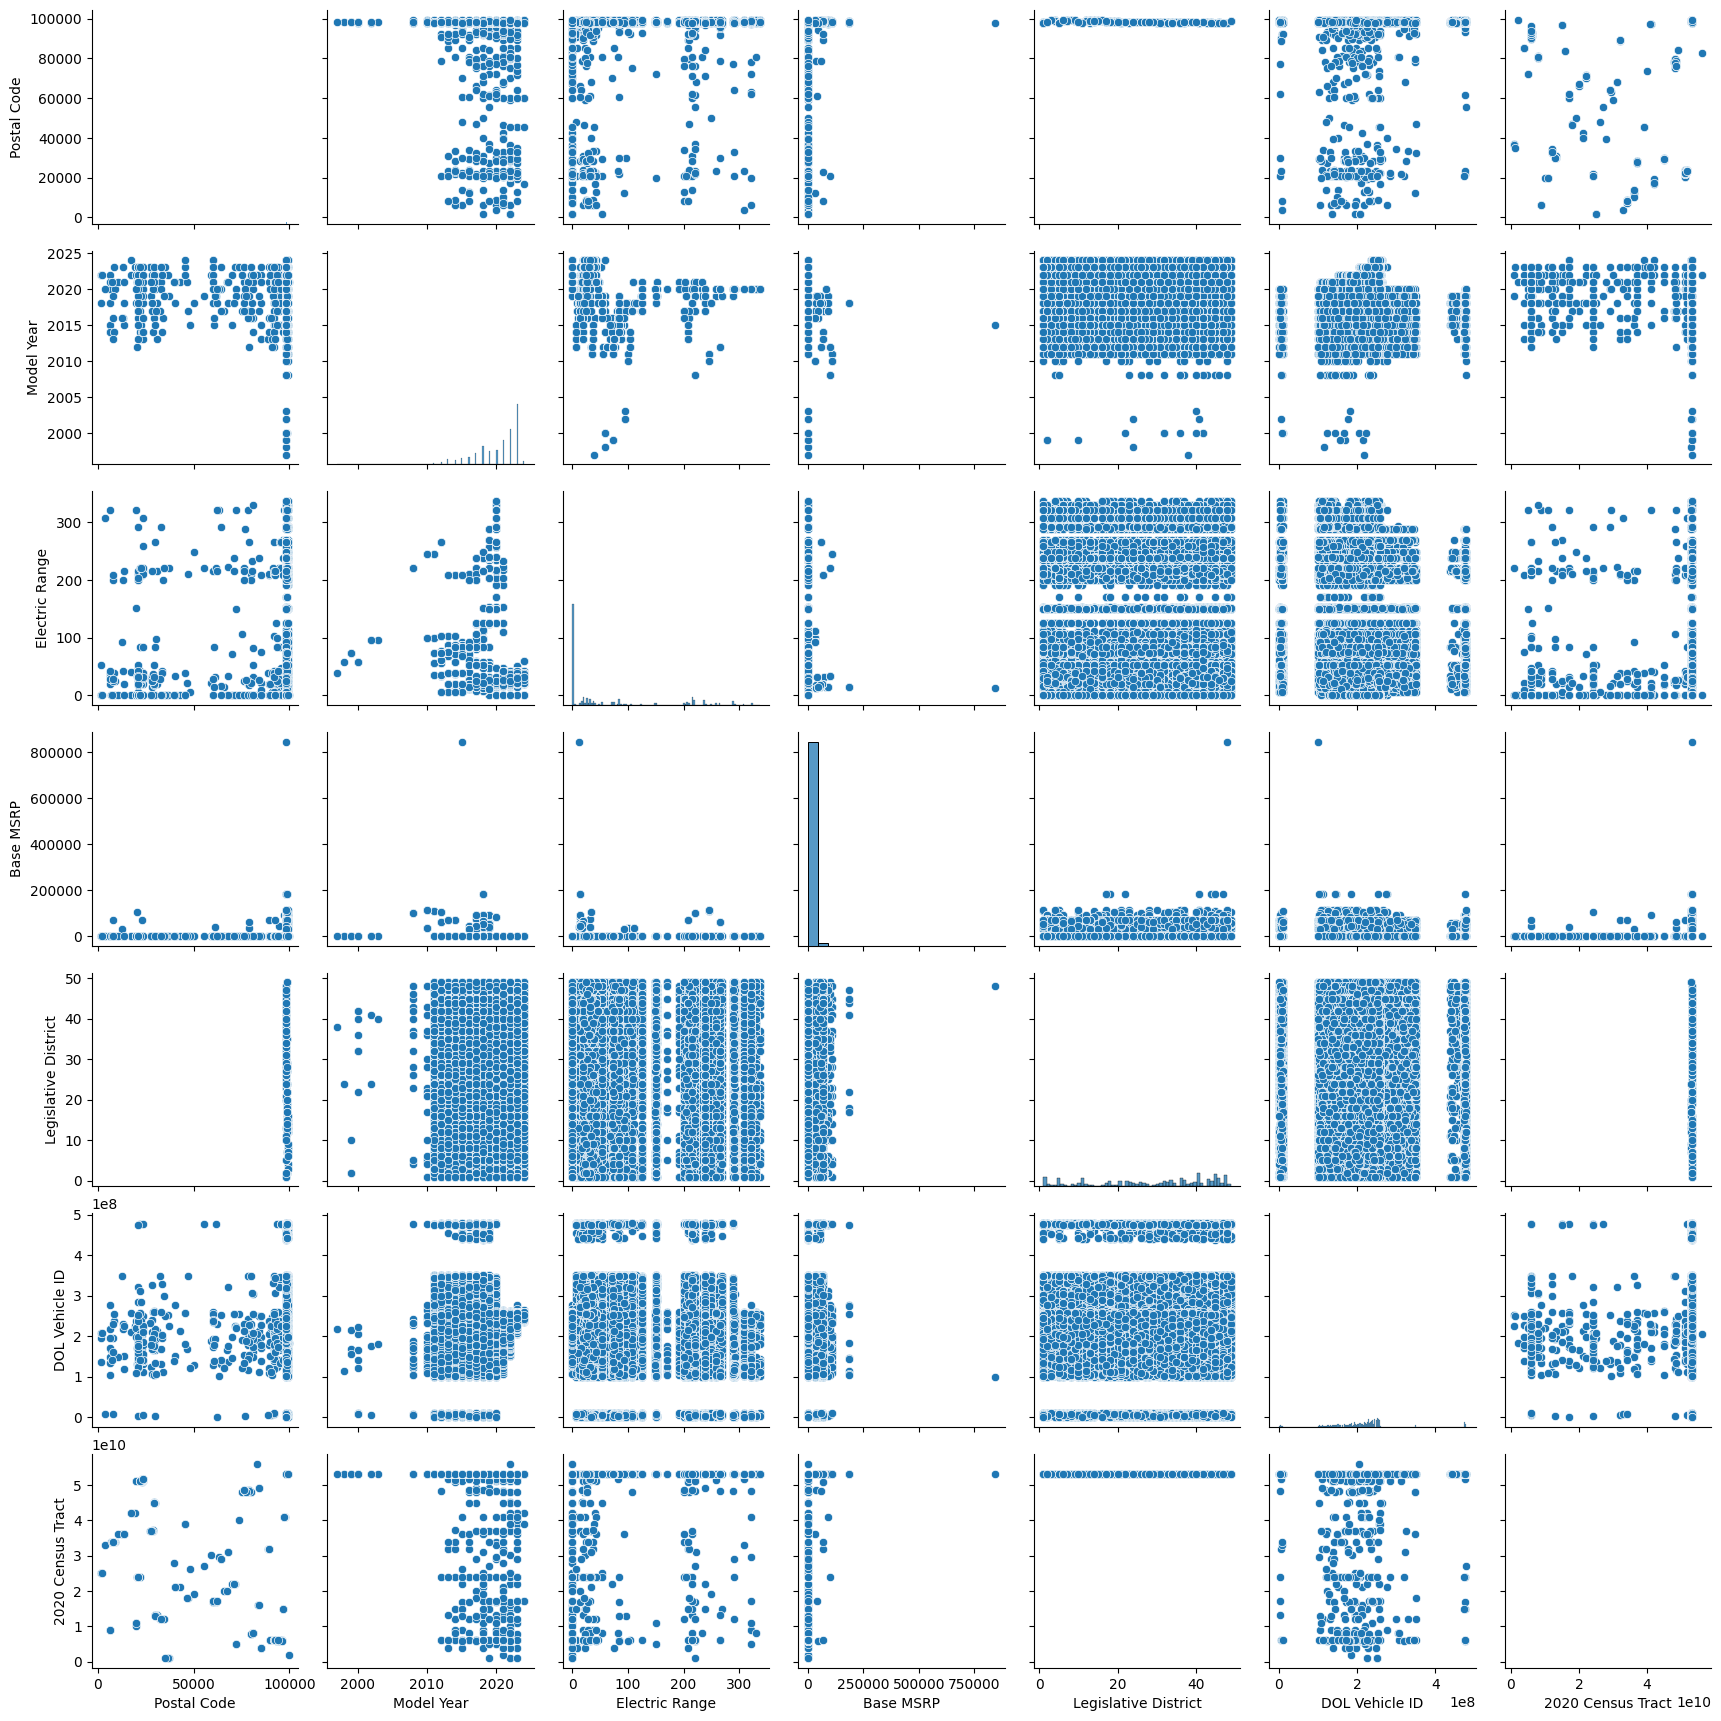

In [11]:
plt.figure(figsize=(12, 8))
sns.pairplot(df)
plt.show()

In [29]:
df.drop(['VIN (1-10)','Postal Code','Base MSRP','Legislative District','DOL Vehicle ID','Electric Utility','2020 Census Tract'],axis=1,inplace=True)


In [30]:
df.head()

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Vehicle Location
0,Thurston,Lacey,WA,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,POINT (-122.7474291 47.0821119)
1,King,Sammamish,WA,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,POINT (-122.0313266 47.6285782)
2,King,Kent,WA,2016,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,POINT (-122.2012521 47.3931814)
3,Kitsap,Poulsbo,WA,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,POINT (-122.64177 47.737525)
4,Thurston,Olympia,WA,2023,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23,POINT (-122.89692 47.043535)


In [31]:
df = df.dropna()

C:\Users\Student\AppData\Local\Temp\ipykernel_23464\2760993910.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




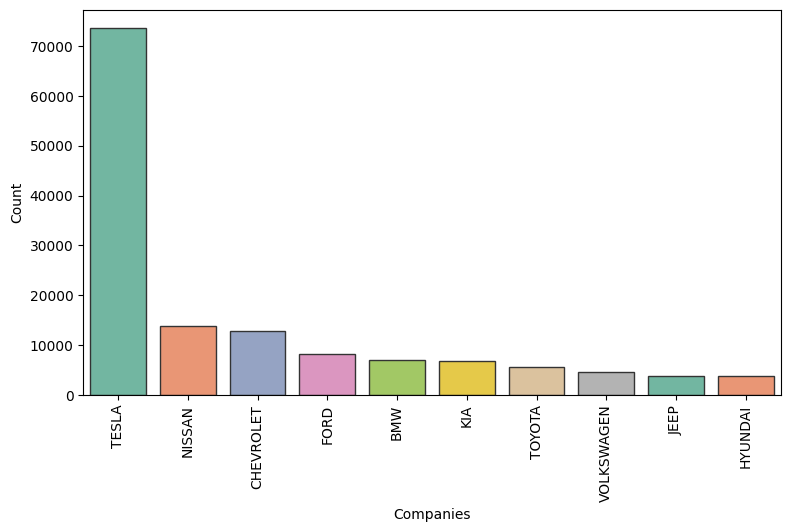

In [32]:
Counties = df.groupby('County').count().sort_values(by='City',ascending=False)['City'].index
values = df.groupby('County').count().sort_values(by='City',ascending=False)['City'].values

px.bar(x=list(Counties)[:10],y=values[:10],labels={'x':"County Name",'y':"Number of Cars"},color=values[:10])
#lets see which company makes most of the electric vehicles
Companies = df.groupby('Make').count().sort_values(by='City',ascending=False)['City'].index
values = df.groupby('Make').count().sort_values(by='City',ascending=False)['City'].values


plt.figure(figsize=(9,5))
sns.barplot(x=list(Companies)[:10],y=values[:10],edgecolor='.2',palette='Set2')
plt.xticks(rotation='vertical')
plt.xlabel('Companies')
plt.ylabel('Count')
plt.show()

C:\Users\Student\AppData\Local\Temp\ipykernel_23464\1174599778.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




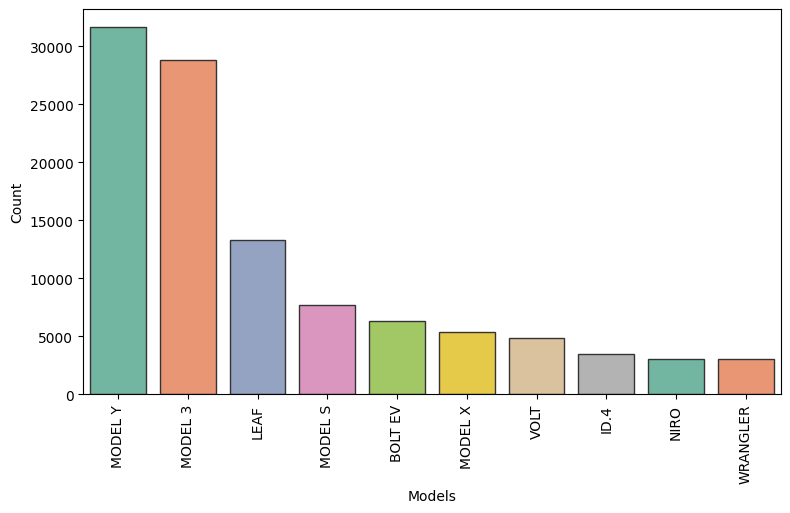

In [33]:
px.pie(names=list(Companies)[:10],values=values[:10],width=500,height=400)
#Top 10 models in use

Models = df.groupby('Model').count().sort_values(by='City',ascending=False)['City'].index
values = df.groupby('Model').count().sort_values(by='City',ascending=False)['City'].values


plt.figure(figsize=(9,5))
sns.barplot(x=list(Models)[:10],y=values[:10],edgecolor='.2',palette='Set2')
plt.xticks(rotation='vertical')
plt.xlabel('Models')
plt.ylabel('Count')
plt.show()

In [34]:
#what are the most sold models per each company
#lets consider the top 10 companies
top_10_companies = list(Companies)[:10]
for i in top_10_companies:
    data = df[df['Make']==i]
    data = data.groupby('Model').count().sort_values(by='City',ascending=False).index
    print('Top selling model for',i,'is ----------->',data[0])

Top selling model for TESLA is -----------> MODEL Y
Top selling model for NISSAN is -----------> LEAF
Top selling model for CHEVROLET is -----------> BOLT EV
Top selling model for FORD is -----------> MUSTANG MACH-E
Top selling model for BMW is -----------> X5
Top selling model for KIA is -----------> NIRO
Top selling model for TOYOTA is -----------> PRIUS PRIME
Top selling model for VOLKSWAGEN is -----------> ID.4
Top selling model for JEEP is -----------> WRANGLER
Top selling model for HYUNDAI is -----------> IONIQ 5


In [35]:
#Percentage of BEV vs PHEV

Vehicle_type = list(df.groupby('Electric Vehicle Type').count()['County'].index)
values = df.groupby('Electric Vehicle Type').count()['County'].values

px.pie(names=Vehicle_type,values=values,height=400)
#lets see whats the percentage of top 10 companies vehicles are BEV and PHEV

for index,i in enumerate(top_10_companies):
    data = df[df['Make']==i]
    labels = list(data.groupby('Electric Vehicle Type').count()['City'].index)
    values = list(data.groupby('Electric Vehicle Type').count()['City'].values)
    fig = px.pie(names=labels,values=values,width=700,height=400,title=str(i))
    fig.show()

<Axes: xlabel='Electric Range', ylabel='Count'>

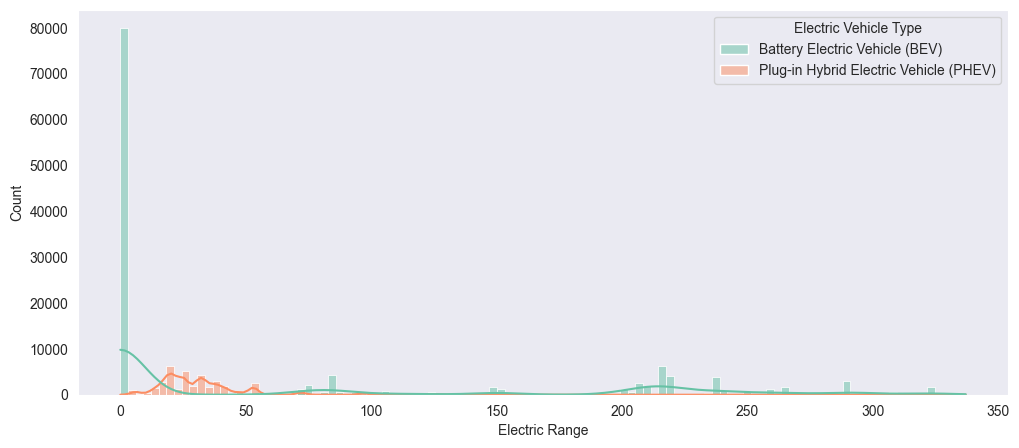

In [36]:
#lets see the electric range difference between PHEV and BEV
plt.figure(figsize=(12,5))
sns.set_style(style='dark')
sns.histplot(x = 'Electric Range',data=df,kde=True,hue='Electric Vehicle Type',palette='Set2')

C:\Users\Student\AppData\Local\Temp\ipykernel_23464\3023104738.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Electric Range', ylabel='Density'>

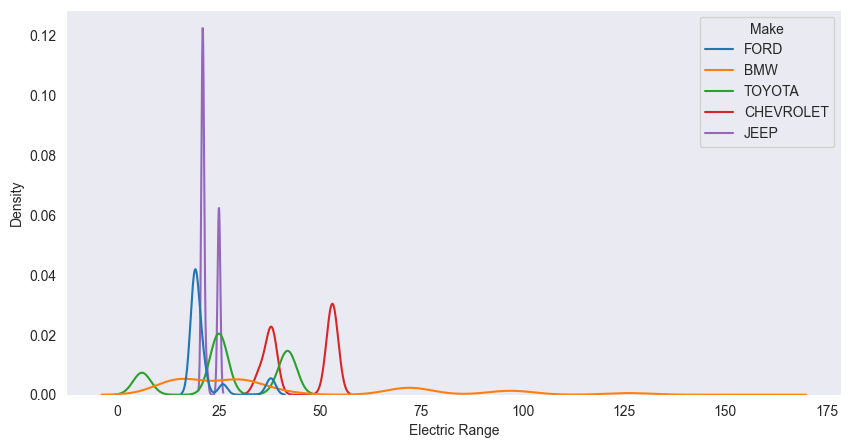

In [37]:

#lets filter out top 5 companies as per each electric vehicle type

#PHEV

data_phev = df[df['Electric Vehicle Type']=='Plug-in Hybrid Electric Vehicle (PHEV)']
companies=list(data_phev.groupby('Make').count().sort_values(by='City',ascending=False)['City'].index)[:5]
data_phev['phe'] = data_phev['Make'].apply(lambda x:1 if x in companies else 0 )
data_phev = data_phev[data_phev['phe']==1]

plt.figure(figsize=(10,5))
sns.kdeplot(x='Electric Range',hue='Make',data=data_phev)

C:\Users\Student\AppData\Local\Temp\ipykernel_23464\2626622709.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Electric Range', ylabel='Density'>

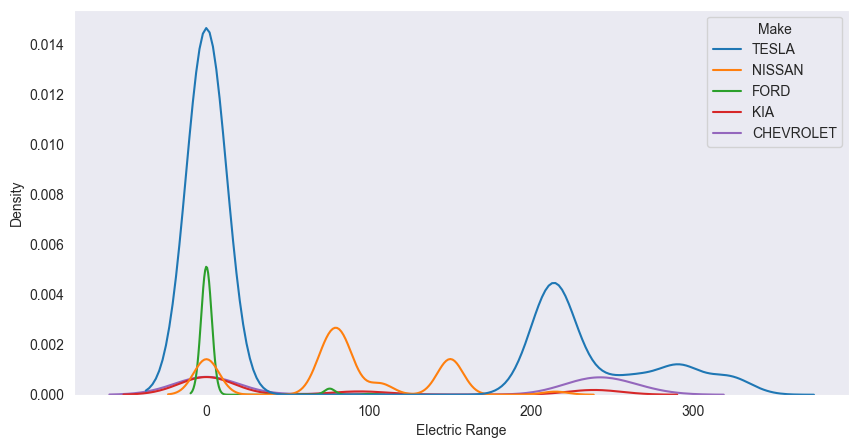

In [38]:
#BEV


data_bev = df[df['Electric Vehicle Type']!='Plug-in Hybrid Electric Vehicle (PHEV)']
companies=list(data_bev.groupby('Make').count().sort_values(by='City',ascending=False)['City'].index)[:5]
data_bev['bev'] = data_bev['Make'].apply(lambda x:1 if x in companies else 0 )
data_bev = data_bev[data_bev['bev']==1]

plt.figure(figsize=(10,5))
sns.kdeplot(x='Electric Range',hue='Make',data=data_bev)

In [39]:
top_10_vehicles = list(df.groupby('Model').count().sort_values(by='City',ascending=False)['City'].index)[:10]
top_10_range =  df.sort_values(by='Electric Range',ascending=False)['Model'].unique()[:10]
top_10_vehicles

['MODEL Y',
 'MODEL 3',
 'LEAF',
 'MODEL S',
 'BOLT EV',
 'MODEL X',
 'VOLT',
 'ID.4',
 'NIRO',
 'WRANGLER']

<Axes: xlabel='Model Year', ylabel='count'>

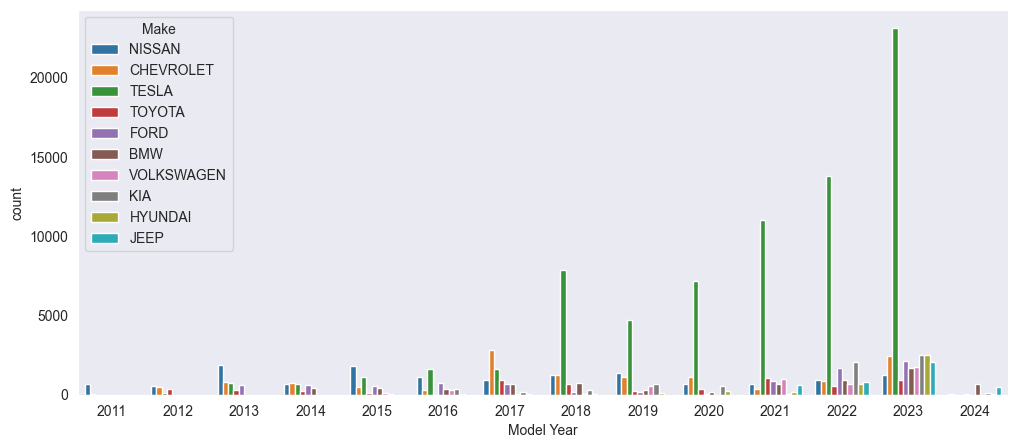

In [40]:
#Number of models of company for each year for last 10 years
#lets consider top_10 companies only

data = df.copy()
data['top_10'] = data['Make'].apply(lambda x:1 if x in top_10_companies else 0)
data = data[data['top_10']==1]
data = data[data['Model Year']>=2011]
plt.figure(figsize=(12,5))
sns.countplot(x = 'Model Year',hue='Make',data=data)

<Axes: >

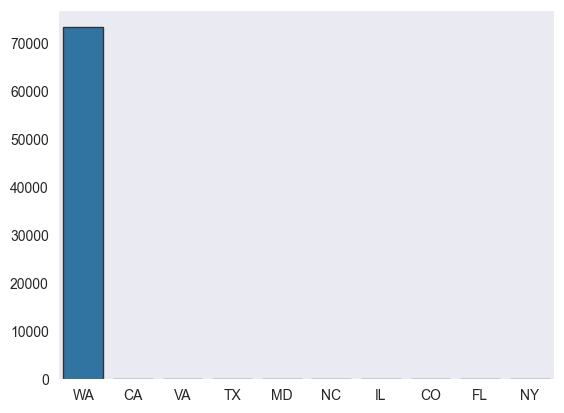

In [41]:
#if we study an individual company TESLA
#1.which state is having more number of TESLA vehicles
#2.Model of which year is in use the most from TESLA

data_TESLA = df[df['Make']=='TESLA']
top_10_states_TESLA = list(data_TESLA.groupby('State').count().sort_values(by='City',ascending=False)['City'].index)[:10]
values = list(data_TESLA.groupby('State').count().sort_values(by='City',ascending=False)['City'].values)[:10]
sns.barplot(x = top_10_states_TESLA,y=values,edgecolor='.2')

<Axes: >

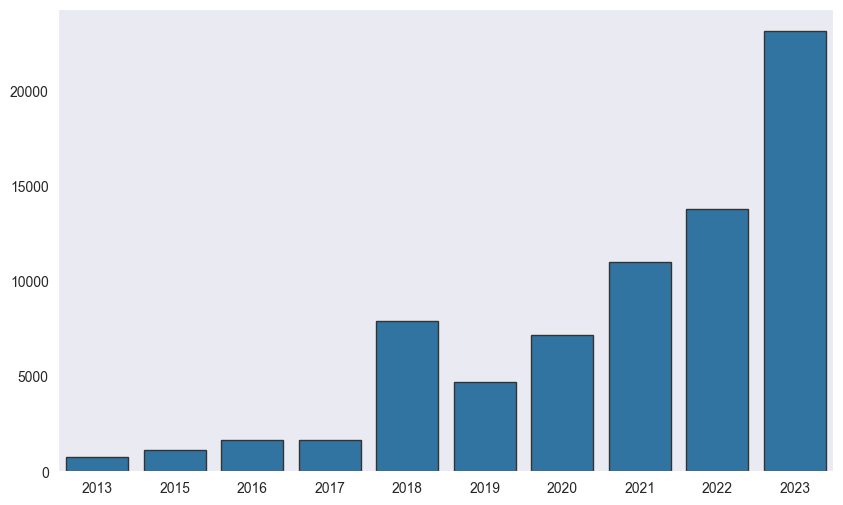

In [42]:
plt.figure(figsize=(10,6))
top_10_year_TESLA = list(data_TESLA.groupby('Model Year').count().sort_values(by='City',ascending=False)['City'].index)[:10]
values = list(data_TESLA.groupby('Model Year').count().sort_values(by='City',ascending=False)['City'].values)[:10]
sns.barplot(x = top_10_year_TESLA,y=values,edgecolor='.2')

(20.0, 60.0)

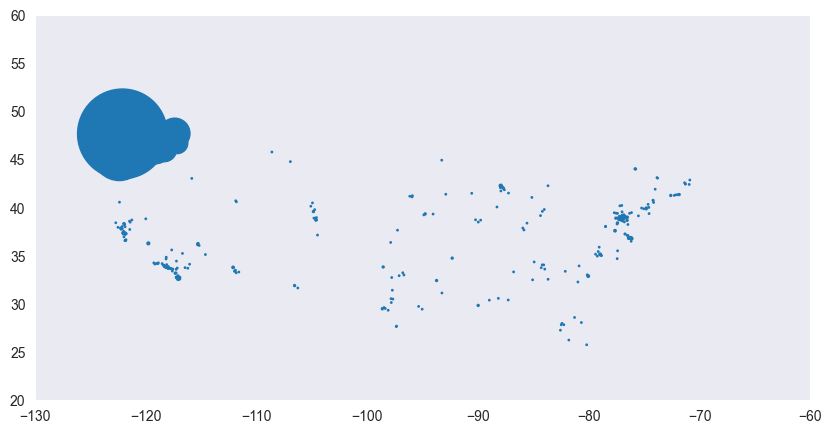

In [43]:
locations = list(df.groupby('Vehicle Location').count()['County'].index)
values = list(df.groupby('Vehicle Location').count()['County'].values)
Location_data = pd.DataFrame({'Locations':locations,'Count':values})
Location_data['Lattitude'] = Location_data['Locations'].apply(lambda x:float(x.split(' ')[1][1:]))
Location_data['Longitude'] = Location_data['Locations'].apply(lambda x:float(x.split(' ')[2][:-1]))

plt.figure(figsize=(10,5))
plt.scatter(x = Location_data['Lattitude'],y = Location_data['Longitude'],s=Location_data['Count'])
plt.xlim(-130,-60)
plt.ylim(20,60)

C:\Users\Student\AppData\Local\Temp\ipykernel_23464\1455638954.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Student\AppData\Local\Temp\ipykernel_23464\1455638954.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(20.0, 50.0)

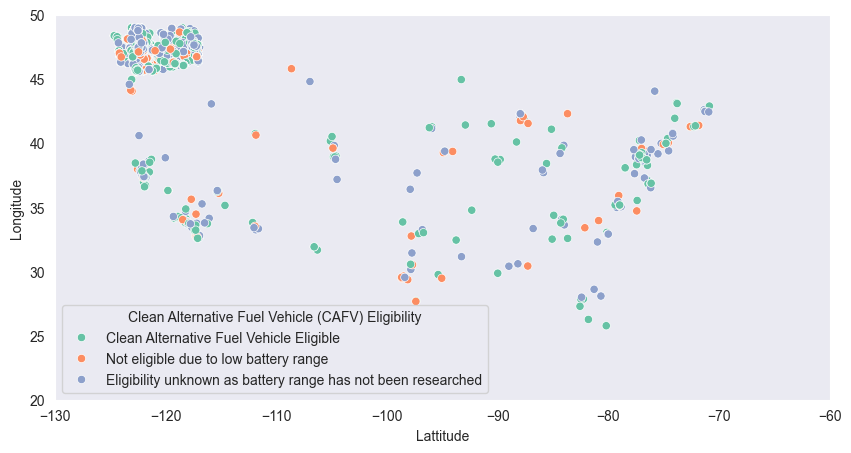

In [44]:
df['Lattitude'] = df['Vehicle Location'].apply(lambda x:float(x.split(' ')[1][1:]))
df['Longitude'] = df['Vehicle Location'].apply(lambda x:float(x.split(' ')[2][:-1]))
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'Lattitude',y = 'Longitude',data=df,hue='Clean Alternative Fuel Vehicle (CAFV) Eligibility',palette='Set2')
plt.xlim(-130,-60)
plt.ylim(20,50)

(20.0, 50.0)

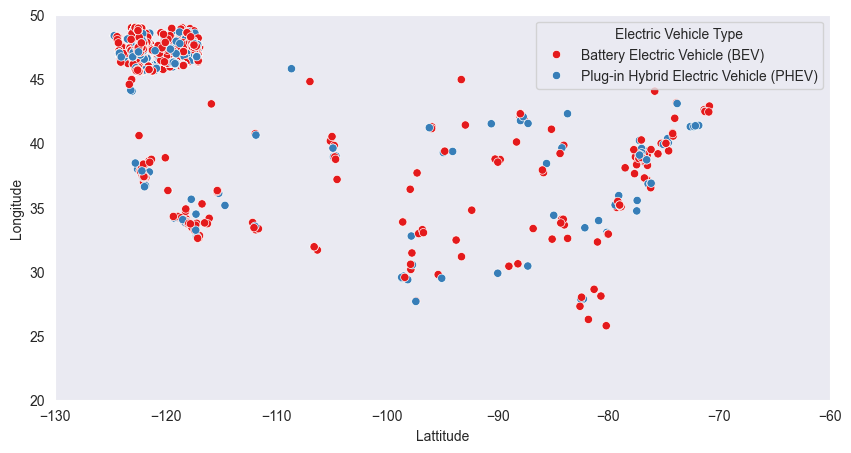

In [45]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'Lattitude',y = 'Longitude',data=df,hue='Electric Vehicle Type',palette='Set1')
plt.xlim(-130,-60)
plt.ylim(20,50)

In [46]:
states = list(df.groupby('State').count().sort_values(by='City',ascending=False)['City'].index)
values = df.groupby('State').count().sort_values(by='City',ascending=False)['City'].values
data = pd.DataFrame(df.groupby('State').count().sort_values(by='City',ascending=False)['City'])
data = data.reset_index()
data.columns = ['State','Count']
fig = px.choropleth(data,
                    locations='State', 
                    locationmode="USA-states", 
                    color='Count',
                    color_continuous_scale="greens", 
                    scope="usa")

fig.show()

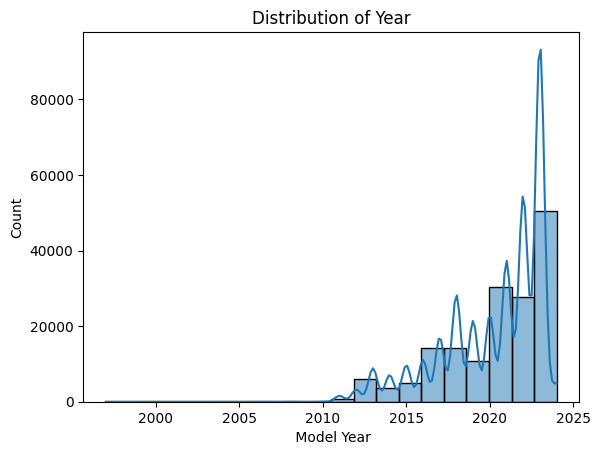

In [12]:
sns.histplot(df['Model Year'], bins=20, kde=True)
plt.title('Distribution of Year')
plt.xlabel(' Model Year')
plt.ylabel('Count')
plt.show()

## Key Steps

1. Data Exploration:
   - Examine the dataset's structure and summary statistics.
   - Identify missing values and outliers.
2. Data Cleaning:
   - Handle missing values by removing rows with missing data.
   - Address outliers using z-score calculations.
3. Feature Engineering:
    - Create new features:
     - Release year from release date
     - Runtime categories (short, medium, long)

     - Popularity and vote average interaction
4. Exploratory Data Analysis:
   - Visualize distributions and relationships among variables using Seaborn and Matplotlib.
   - Examine descriptive statistics.
5. Conclusions:
   -This project provides valuable insights into the electric vehicle population in the United States, offering a comprehensive analysis of various factors influencing the adoption and characteristics of electric vehicles.

Feel free to explore and contribute to the project, and don't hesitate to raise issues or provide feedback.
     


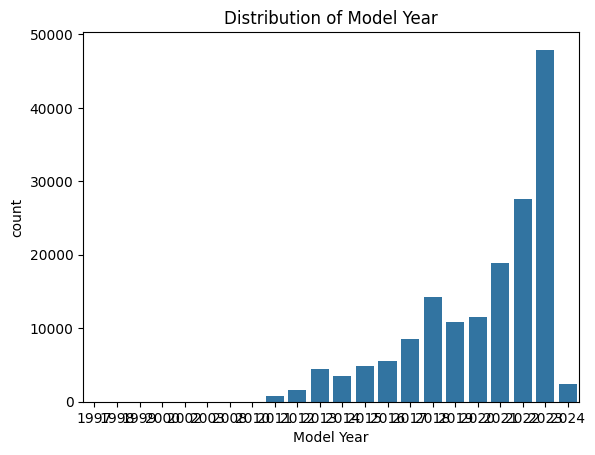

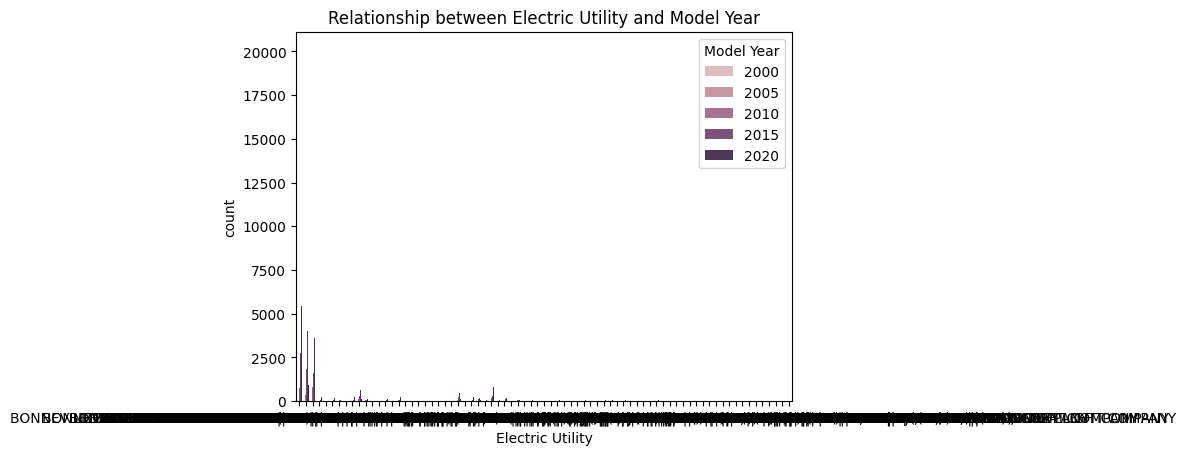

In [13]:
# Visualize the distribution of 'Model Year'
sns.countplot(x='Model Year', data=df)
plt.title('Distribution of Model Year')
plt.show()

# Visualize the relationship between 'Electric Utility' and 'Model Year'
sns.countplot(x='Electric Utility', hue='Model Year', data=df)
plt.title('Relationship between Electric Utility and Model Year')
plt.show()

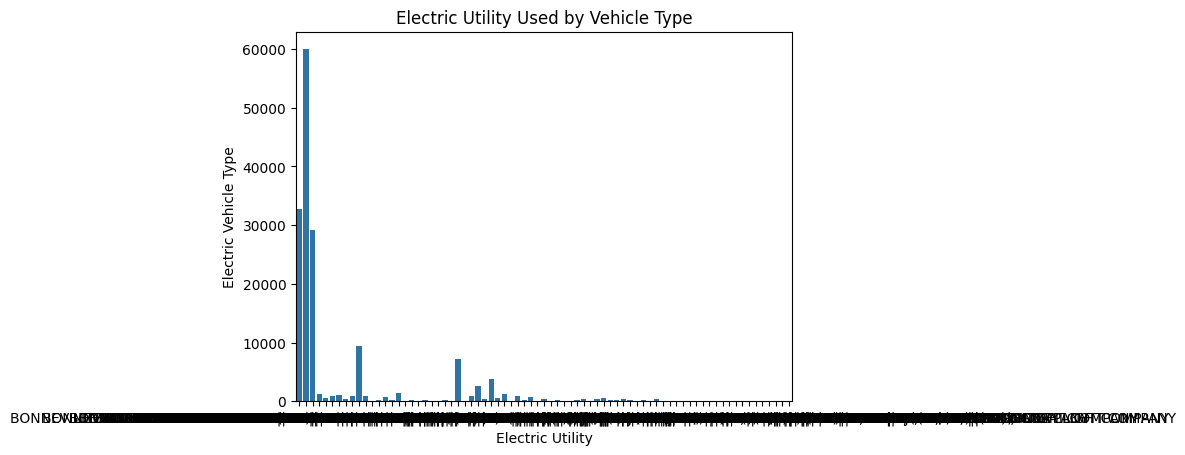

In [14]:


# Visualize the distribution of 'Number of electrical car distribution'
sns.countplot(x='Electric Utility', data=df)
plt.title('Electric Utility Used by Vehicle Type')
plt.xlabel('Electric Utility')
plt.ylabel('Electric Vehicle Type')
plt.show()

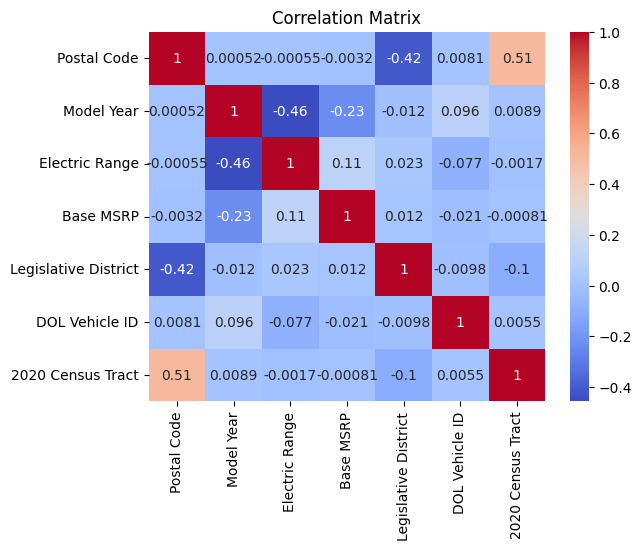

In [15]:
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

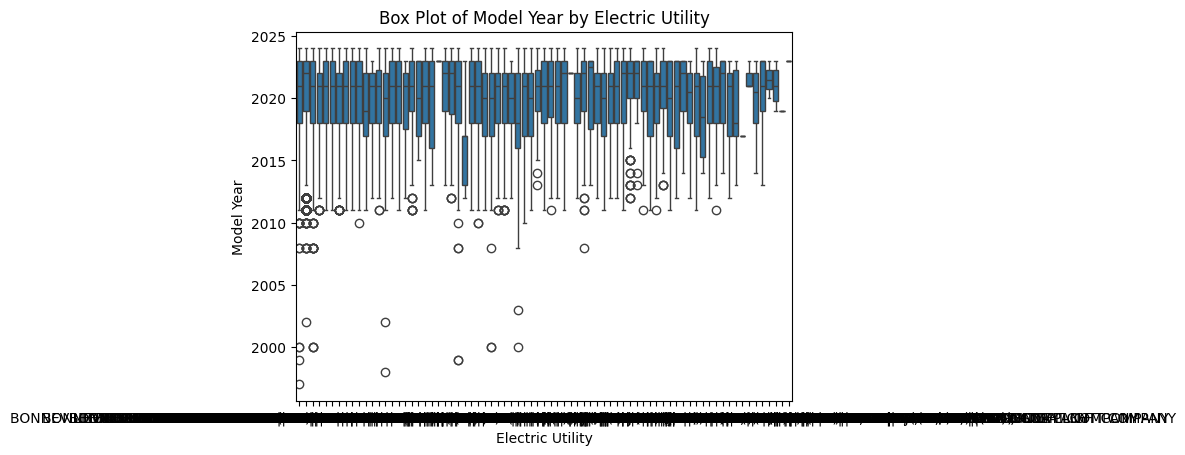

In [16]:
sns.boxplot(x='Electric Utility', y='Model Year', data=df)
plt.title('Box Plot of Model Year by Electric Utility')
plt.show()